# Ex10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use(['science', 'notebook'])#, 'ieee'])
plt.rcParams['font.family']='times new roman'

## Part 1

Text(0.5, 1.0, 'Illuminance as Function of Analyzer Angle')

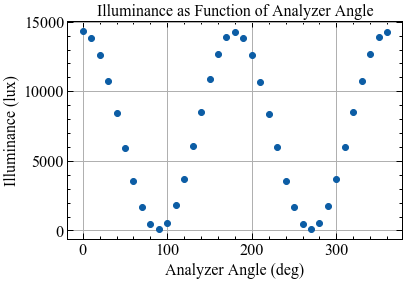

In [2]:
#get data
alpha1, illum1 = np.loadtxt('ex10_1.csv', delimiter=',', unpack=True, skiprows=1, usecols=(4,5))

#raw data plot
plt.plot(alpha1, illum1, 'o')
plt.grid()
plt.xlabel("Analyzer Angle (deg)")
plt.ylabel("Illuminance (lux)")
plt.title("Illuminance as Function of Analyzer Angle")
#plt.savefig('data_1.png')

In [3]:
#normalize irradiance 
NI = illum1/max(illum1)

In [4]:
def consistencycheck(a,b):
    if(abs(a.n-b.n) <= a.s+b.s):
        return True
    else:
        return False

In [5]:
#consistency check
print((.9937-1)/1)

print(.9937+.0017)


-0.006299999999999972
0.9954000000000001


## part 2.1

In [6]:
#get data
df = pd.read_table('ex10_21.csv', sep=',')
alpha21 = df["Analyzer Angle"]; illum21 = df['Illumination']

range of illuminance, I_range =  307.04268668999975
average illuminance at optimal voltage, I_avg =  6957.592050978378
Variation in illuminance at optimal voltage, Delta_I =  4.4130596396036665
Thus, the illuminance at the optimal voltage is 6958 +/- 2.10 %


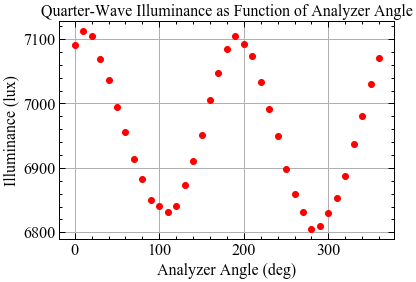

In [15]:
#raw data plot
plt.figure(1); plt.close(1)
plt.plot(alpha21, illum21, 'o', color='r')#,linewidth=1, color='b')
plt.grid()
plt.xlabel('Analyzer Angle (deg)')
plt.ylabel('Illuminance (lux)')
plt.title('Quarter-Wave Illuminance as Function of Analyzer Angle')
#plt.savefig('data_21.png')

#find percentage for range
range_irr = max(illum21) - min(illum21) #take largest difference for uncertainy
avg_irr = np.mean(illum21)
var_irr = range_irr/avg_irr
err_irr = np.sqrt(var_irr*100 #std dev = sqrt(variance) 
print("range of illuminance, I_range = ", range_irr)
print("average illuminance at optimal voltage, I_avg = ", avg_irr)
print("Variation in illuminance at optimal voltage, Delta_I = ", del_irr*100)
print("Thus, the illuminance at the optimal voltage is %3.f +/- %.2f"%(avg_irr, err_irr), "%")

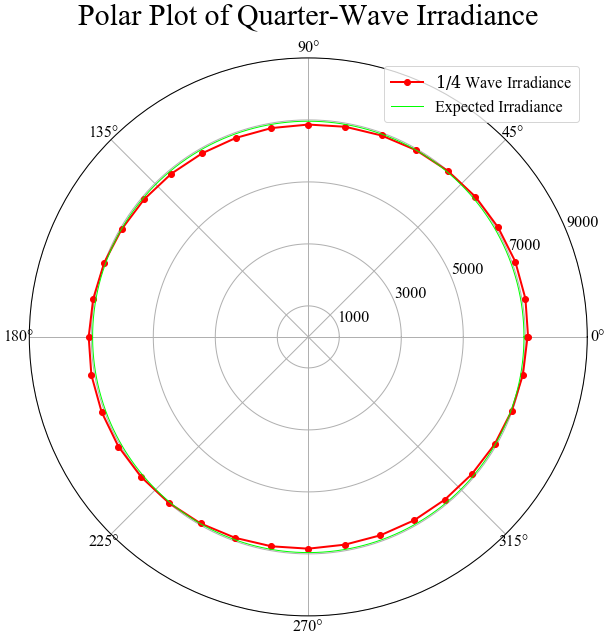

In [8]:
#polar plot
a = alpha21*np.pi/180 #need radians, not degrees
theta = np.linspace(0,2*np.pi,1000)
circ = np.ones(1000)*avg_irr

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,15))
ax.plot(a,illum21, 'o-', color='r', label='$1/4$ Wave Irradiance')
ax.plot(theta, circ, linewidth=1, color='lime', label='Expected Irradiance' )
ax.set_title("Polar Plot of Quarter-Wave Irradiance", size=30)
ax.set_rmax(9000)
ax.set_rticks([1000,3000,5000,7000,9000])
plt.legend(loc='upper right',frameon=True)
#plt.savefig("polar_21.png")
plt.show()
plt.close()

In [31]:
#find major and minor axis of polar plot
maj_axis=[0,0]
min_axis =[7500*2,0] #upper estimate of diameter
for i in range(19): #only need to do half the measurements because diameter
    diam = illum21[i]+illum21[i+18] #measurements in 10deg increments, so opposite point is +18 measurements
    if diam > maj_axis[0]:
        maj_axis[0] = diam
        print(maj_axis)
        maj_axis[1] = np.sqrt((illum21[i]*err_irr)**2 + (illum21[i+18]*err_irr)**2)
    if diam < min_axis[0]:
        min_axis[0] = diam
        min_axis[1] = np.sqrt((illum21[i]*err_irr)**2 + (illum21[i+18]*err_irr)**2)  #delta min_axis
print('major axis = %.6f +/- %.6f'%(maj_axis[0], maj_axis[1]))
print('minor axis = %.6f +/- %.6f' %(min_axis[0], maj_axis[1]))
a_ratio = maj_axis[0]/min_axis[0]
a_ratio_err = np.sqrt((maj_axis[0]/maj_axis[1])**2 + (min_axis[0]/min_axis[1])**2) #abs error of a_ratio
print('aspect ratio = %.6f +/- %.6f' %(a_ratio, a_ratio_err))
#consistency check:
print(a_ratio*a_ratio_err, '>=', a_ratio-1, "?")
print('yes, aspect ratio is consistent')
print("% diff = ", abs(a_ratio + 1)/1)

[14174.59543757, 0]
[14216.86606463, 21055.502585918042]
major axis = 14216.866065 +/- 21118.294010
minor axis = 13641.799732 +/- 21118.294010
aspect ratio = 1.042155 +/- 0.952050
0.9921835074103293 >= 0.04215472623286409 ?
yes, aspect ratio is consistent
% diff =  2.042154726232864


## 2.2

In [10]:
#get data
df = pd.read_table('ex10_22.csv', sep=',')
alpha22 = df["Analyzer Angle"]; illum22 = df['Illumination']

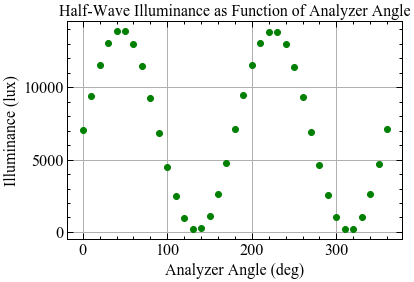

In [11]:
#raw data plot
plt.figure(1); plt.close(1)
plt.plot(alpha22, illum22, 'o', color='g')#,linewidth=1, color='b')
plt.grid()
plt.xlabel('Analyzer Angle (deg)')
plt.ylabel('Illuminance (lux)')
plt.title('Half-Wave Illuminance as Function of Analyzer Angle')
plt.savefig('data_22.png')

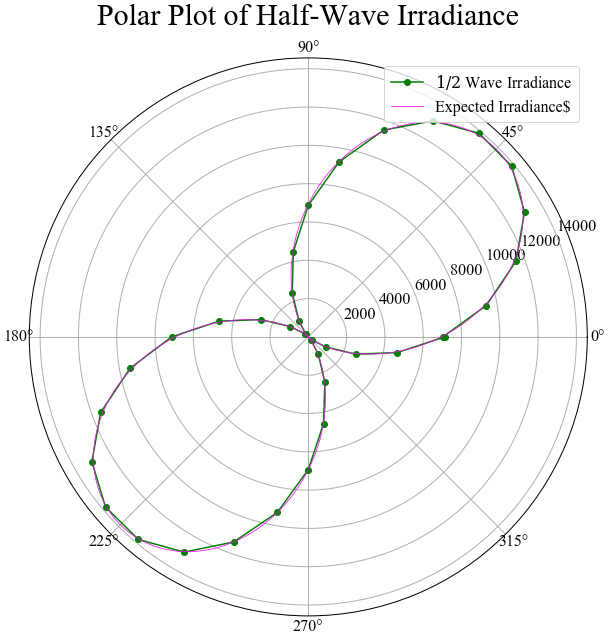

204.385449534

In [35]:
a = alpha22*np.pi/180 #need radians, not degrees
theta = np.linspace(0,2*np.pi,1000)
i0 = max(illum22)/2
#plane of vibration is at -45deg
a0 = -np.pi/4
r = i0 + (i0*np.cos(2*(theta+a0)))
              
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10,15))
ax.plot(a,illum22, 'o-', linewidth=1.5, color='g', label='$1/2$ Wave Irradiance')
ax.plot(theta, r, linewidth=.75, color='magenta', label='Expected Irradiance$' )
ax.set_title("Polar Plot of Half-Wave Irradiance", size=30)
ax.set_rmin(0)
#ax.set_rticks([1000,3000,5000,7000,9000])
plt.legend(loc='upper right',frameon=True)
plt.savefig("polar_22.png")
plt.show()
plt.close()